<a href="https://colab.research.google.com/github/OMONa-E/Datetime-Data-Analysis/blob/main/Chicago_Crime_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
> **Author: *Omona Emmanuel***


##### Mount Drive

In [6]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# Folder path
fpath = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week13/Data/Data/Chicago'

##### Imports Packages

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
# set display to 100 maximum columns
pd.set_option('display.max_columns',100)
import glob

##### Load data and Inspect

In [9]:
try:
  crime_files = sorted(glob.glob(fpath+"*.csv"))
  df = pd.concat([pd.read_csv(f) for f in crime_files])
  print('Successful')

except Exception:
  print('Check file path or object to concat if exists')

Successful


In [10]:
# make a copy
crime_df = df.copy()

In [11]:
display(df.info(verbose=True, show_counts=True), crime_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    7713109 non-null  int64  
 1   Date                  7713109 non-null  object 
 2   Primary Type          7713109 non-null  object 
 3   Description           7713109 non-null  object 
 4   Location Description  7702181 non-null  object 
 5   Arrest                7713109 non-null  bool   
 6   Domestic              7713109 non-null  bool   
 7   Beat                  7713109 non-null  int64  
 8   District              7713062 non-null  float64
 9   Ward                  7098263 non-null  float64
 10  Latitude              7624424 non-null  float64
 11  Longitude             7624424 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


None

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970


In [12]:
# converting date dtype and dropping NaT
crime_df['Date'] = pd.to_datetime(crime_df['Date'], errors='coerce')
crime_df = crime_df.dropna(subset=['Date'])
## setting index and sorting
crime_df.set_index('Date', inplace=True)
crime_df.sort_index(inplace=True)

crime_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707


#### Comparing Police Districts
>Which district had the most crimes in 2022?
>`8.0`

>Which had the least?
`31.0`

In [13]:
# crime by year
crime_df['year'] = crime_df.index.year
# groupby quering and sorting from min to max
crime_by_year_2022 = crime_df.query('year == 2022').groupby(['District'])['year'].value_counts().sort_values()
# converting to Dataframe dtype
crime_yr = crime_by_year_2022.to_frame().reset_index()
# displaying min, max and dataframe
print(f'''
{'-'*30}
      Minimun_Crime_2022_District: {crime_yr.loc[0, 'District']}
      Maximun_Crime_2022_District: {crime_yr.loc[(len(crime_yr)-1), 'District']}
{'-'*30}\n''')
display(crime_yr)


------------------------------
      Minimun_Crime_2022_District: 31.0
      Maximun_Crime_2022_District: 8.0
------------------------------



,District,year,count
0,31.0,2022,15
1,20.0,2022,4960
2,17.0,2022,6997
3,22.0,2022,7671
4,14.0,2022,8158
5,15.0,2022,8308
6,24.0,2022,8469
7,16.0,2022,9226
8,5.0,2022,9773
9,10.0,2022,9961


In [14]:
crime_df.loc['2022', 'District']

Date
2022-01-01 00:00:00    24.0
2022-01-01 00:00:00    12.0
2022-01-01 00:00:00     5.0
2022-01-01 00:00:00     6.0
2022-01-01 00:00:00     7.0
                       ... 
2022-12-31 23:47:00    22.0
2022-12-31 23:47:00    22.0
2022-12-31 23:50:00    15.0
2022-12-31 23:50:00    24.0
2022-12-31 23:55:00    15.0
Name: District, Length: 238858, dtype: float64

#### Crimes Across the Years:

>Is the total number of crimes increasing or decreasing across the years?
> `We see steady flow down of total crime from the 2001 to 2021 and a slight increased in the year 2022`

>Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
> `Yes, there're some individual crimes that are contrary to the general trend as seen the plots`​

In [15]:
# creating Dataframe for year trend
overall_crimes_across_years = crime_df['year'].value_counts().to_frame().reset_index()
overall_crimes_across_years.head(3)

,year,count
0,2002,486807
1,2001,485886
2,2003,475985


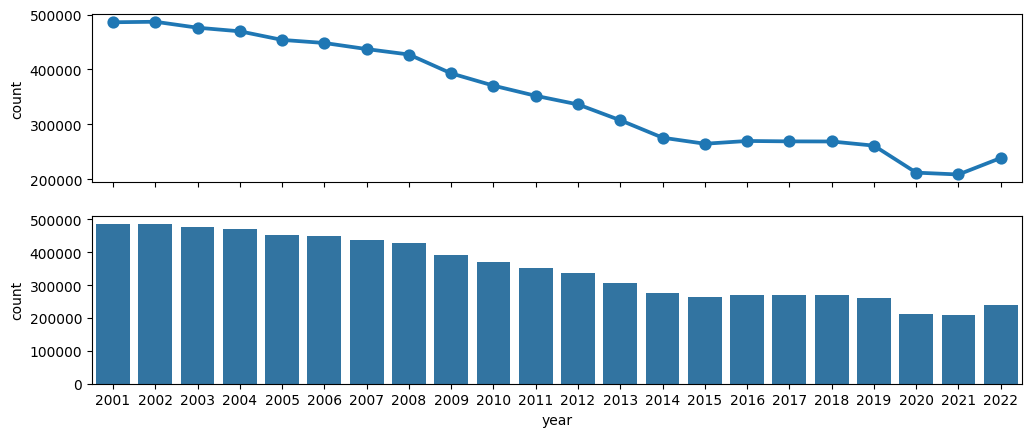

In [16]:
# plotting point graph to determine trend
fig, ax = plt.subplots(nrows=2, sharex=True);
fig.set_figwidth(12)
sns.pointplot(overall_crimes_across_years, x='year', y='count', ax=ax[0]);
sns.barplot(overall_crimes_across_years, x='year', y='count', ax=ax[1]);

In [17]:
# checking occurence of crime
crime_df['Primary Type'].nunique(), crime_df['Description'].nunique()

(36, 547)

In [18]:
## individual crime through the years range
# we shall use Primary Type since has low occurence
overall_each_crime = crime_df.groupby(['Primary Type'])['year'].value_counts().sort_values().to_frame().reset_index()

overall_each_crime

,Primary Type,year,count
0,RITUALISM,2007,1
1,NON-CRIMINAL,2009,1
2,RITUALISM,2004,1
3,RITUALISM,2020,1
4,NON-CRIMINAL (SUBJECT SPECIFIED),2014,1
...,...,...,...
684,BATTERY,2002,94153
685,THEFT,2004,95463
686,THEFT,2002,98332
687,THEFT,2003,98876


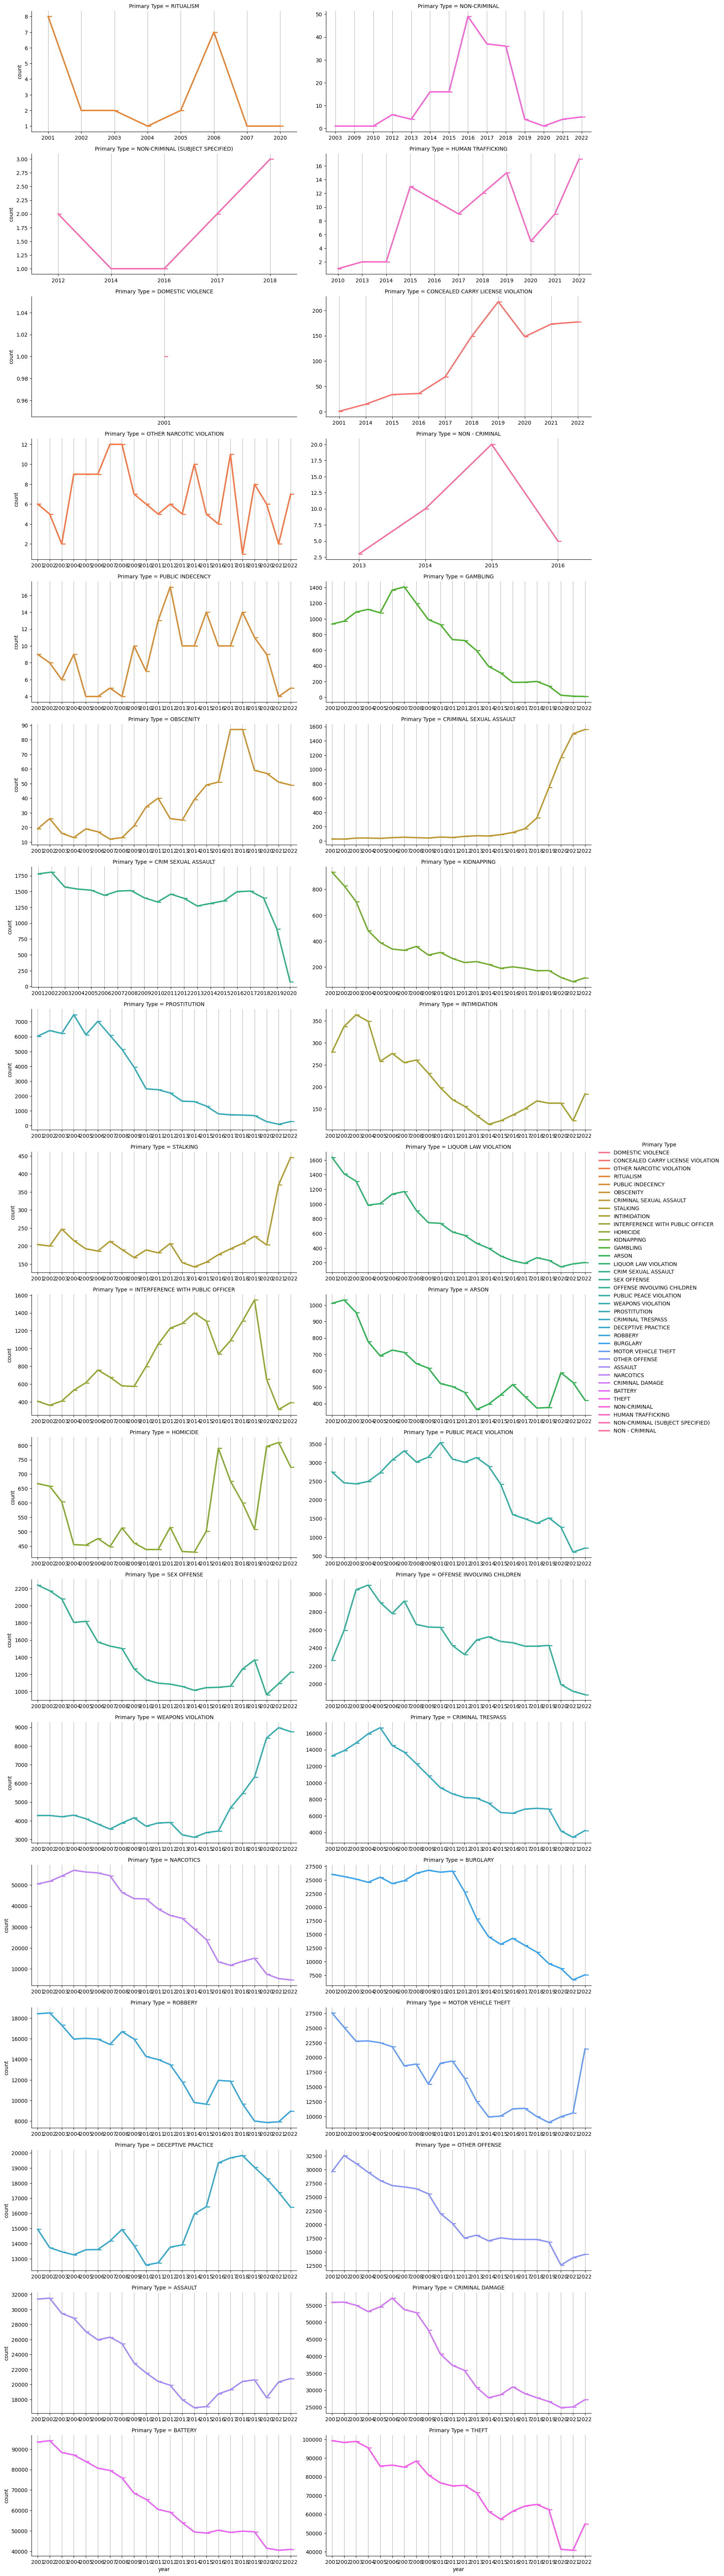

In [19]:
# fig, ax = plt.subplots(figsize=(13, 4))
pl = sns.catplot(data=overall_each_crime, x='year', y='count', markers=True, kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in pl.axes];

#### What cycles (seasonality) can you find in this data?
>(Total Crime (Monthly))

​How long is a cycle?
`365 days`

​What is the magnitude of the cycle? (Compare min and max).
`~8897.74`

In [20]:
# making dataframe for total crime using primary type and index-datetime of crime
crime_ts = crime_df['Primary Type'].index.value_counts().to_frame()
crime_ts.head(3)

,count
Date,
2008-01-01 00:01:00,304
2007-01-01 00:01:00,259
2006-01-01 00:01:00,226


In [21]:
# checking for null values
crime_ts.isnull().sum()

count    0
dtype: int64

In [22]:
# resampling on monthly
crime_ts_monthly = crime_ts.resample('M').sum()
crime_ts_monthly.head(3)

,count
Date,
2001-01-31,38119
2001-02-28,33787
2001-03-31,40566


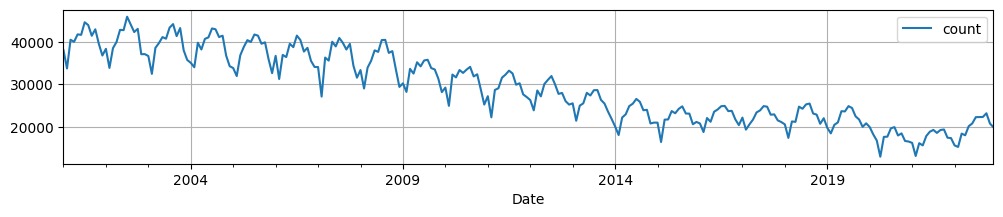

In [23]:
# visualizing without seasonality
crime_ts_monthly.plot(grid=True, figsize=(12,2));

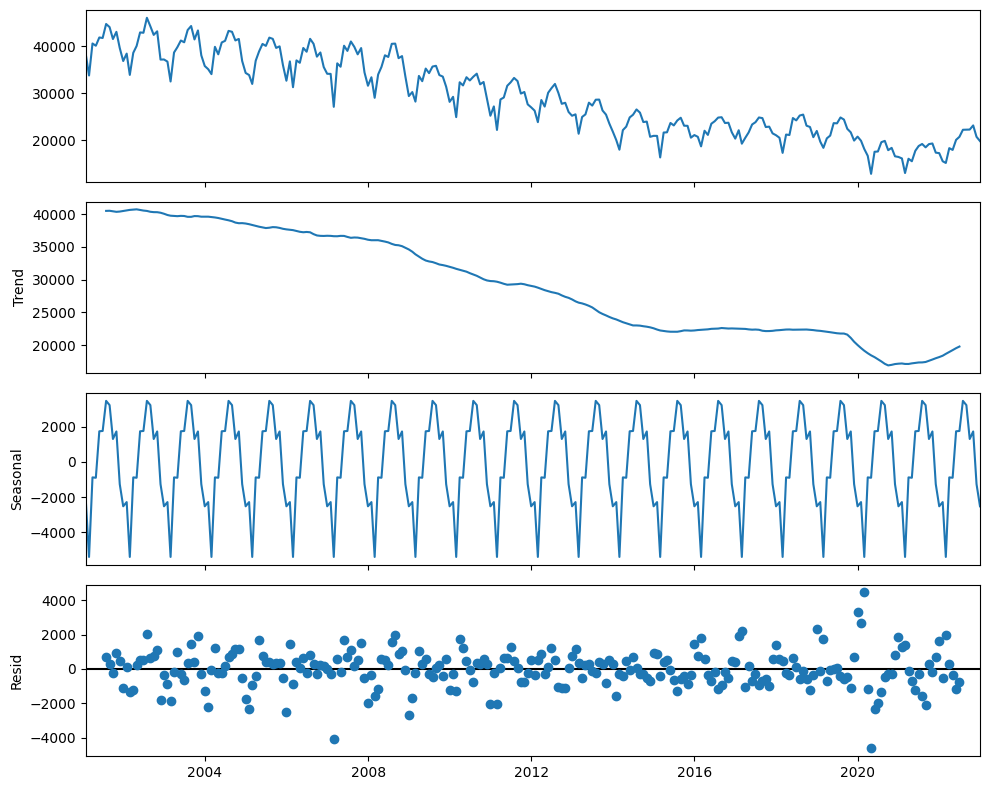

In [24]:
# seasonality ploting
import statsmodels.tsa.api as tsa

decomp_monthly = tsa.seasonal_decompose(crime_ts_monthly)

# plot decomposed
fig = decomp_monthly.plot()
fig.set_size_inches(10, 8)
fig.tight_layout()

In [28]:
# custom function for ploting
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for Total Monthly Occurence of Crime');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax

In [34]:
# calculating cycle of occurence
from scipy.signal import find_peaks

# define seasonal
seasonal_monthly = decomp_monthly.seasonal
# definding peaks and props
peaks, props = find_peaks(seasonal_monthly, height=seasonal_monthly.max())

peaks, props

(array([  6,  18,  30,  42,  54,  66,  78,  90, 102, 114, 126, 138, 150,
        162, 174, 186, 198, 210, 222, 234, 246, 258]),
 {'peak_heights': array([3481.65542328, 3481.65542328, 3481.65542328, 3481.65542328,
         3481.65542328, 3481.65542328, 3481.65542328, 3481.65542328,
         3481.65542328, 3481.65542328, 3481.65542328, 3481.65542328,
         3481.65542328, 3481.65542328, 3481.65542328, 3481.65542328,
         3481.65542328, 3481.65542328, 3481.65542328, 3481.65542328,
         3481.65542328, 3481.65542328])})

In [37]:
# definding peaks dates
peaks_dt = seasonal_monthly.index[peaks]

peaks_dt

DatetimeIndex(['2001-07-31', '2002-07-31', '2003-07-31', '2004-07-31',
               '2005-07-31', '2006-07-31', '2007-07-31', '2008-07-31',
               '2009-07-31', '2010-07-31', '2011-07-31', '2012-07-31',
               '2013-07-31', '2014-07-31', '2015-07-31', '2016-07-31',
               '2017-07-31', '2018-07-31', '2019-07-31', '2020-07-31',
               '2021-07-31', '2022-07-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [40]:
# periodic cycle
period = peaks_dt[1] - peaks_dt[0]

# fluctuation
delta = seasonal_monthly.max() - seasonal_monthly.min()

period, delta

(Timedelta('365 days 00:00:00'), 8897.74404761905)

There is seasonality in the years span crime reports with a period of 365 days 00:00:00, 
with an overall seasonal fluctuation of ~8897.74404761905 crimes per month



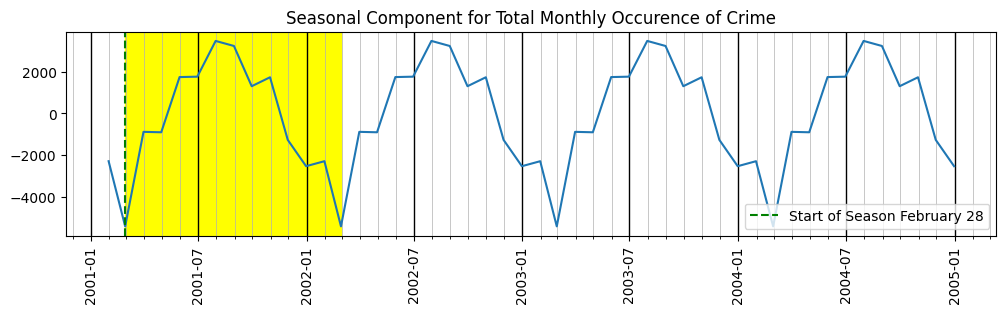

In [54]:
# ploting seasonal graph
fig, ax = plot_seasonal(seasonal_monthly.loc['2000' : '2004'])
# shading periodic zone
ax.axvspan(seasonal_monthly.idxmin(), (seasonal_monthly.idxmin() + period), color='yellow');
# adding aline start at the period span
ax.axvline(seasonal_monthly.idxmin(), color='green', ls='--', label=f"Start of Season {seasonal_monthly.idxmin().strftime('%B %d')}")
ax.legend();
print(f'''There is seasonality in the years span crime reports with a period of {period},
with an overall seasonal fluctuation of ~{delta} crimes per month\n''')

In [30]:
# # tranposing primary type entries into features
# transposed_crime_ts = pd.pivot_table(crime_ts, index=crime_ts.index, columns='Primary Type', aggfunc=len, fill_value=0)
# transposed_crime_ts.head(3)
# transposed_crime_ts.isnull().sum()
# transposed_crime_ts.plot(subplots=True, grid=True, figsize=(12,15), alpha=0.7);